___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 50)
import nltk

In [66]:
nltk.download('punkt')       # Loads the necessary files for sentence and word tokenization.
nltk.download('stopwords')   # loads stopword datasets
nltk.download('wordnet')     # loads the necessary files for normalization.
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Loading the Dataset

In [67]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [68]:
df.shape

(23486, 11)

In [69]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  Positive Feedback Count   Division Name  \
0       4                1                        0       Initmates   
1       5                1                        4         General   
2       3                0                        0         General   
3       5                1                        0  General Petite   
4       5                1                        6         General   

  Department Name Class Name  
0        Intimate  Intimates  
1         Dresses    Dresses  
2         Dresses    Dresses  
3         Bottoms      Pants  
4            Tops

In [70]:
df.describe().T
# not sure if someone with age 99 will rate the outfits
# seems we have imbalanced data since the mean of the ratings is 4.2 which indicates that the high ratings are the dominant

count          mean          std   min      25%  \
Unnamed: 0               23486.0  11742.500000  6779.968547   0.0  5871.25   
Clothing ID              23486.0    918.118709   203.298980   0.0   861.00   
Age                      23486.0     43.198544    12.279544  18.0    34.00   
Rating                   23486.0      4.196032     1.110031   1.0     4.00   
Recommended IND          23486.0      0.822362     0.382216   0.0     1.00   
Positive Feedback Count  23486.0      2.535936     5.702202   0.0     0.00   

                             50%       75%      max  
Unnamed: 0               11742.5  17613.75  23485.0  
Clothing ID                936.0   1078.00   1205.0  
Age                         41.0     52.00     99.0  
Rating                       5.0      5.00      5.0  
Recommended IND              1.0      1.00      1.0  
Positive Feedback Count      1.0      3.00    122.0

In [71]:
df.isnull().sum()
# we have null texts

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

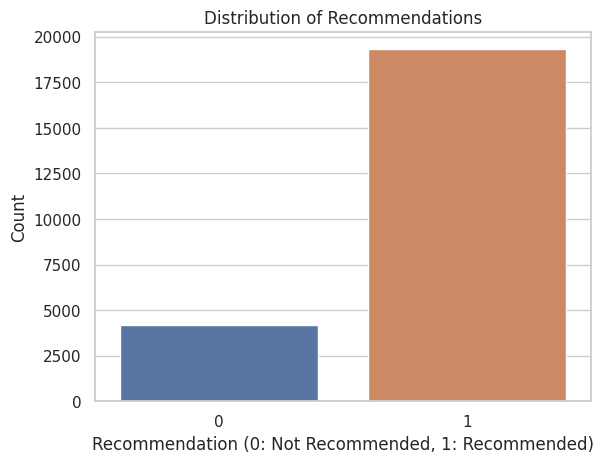

In [72]:
# Create a countplot to visualize the distribution of recommendations
sns.countplot(x='Recommended IND', data=df)
plt.title('Distribution of Recommendations')
plt.xlabel('Recommendation (0: Not Recommended, 1: Recommended)')
plt.ylabel('Count')
plt.show()
# so that means the customers are most likely to recommend the products, so imbalanced data

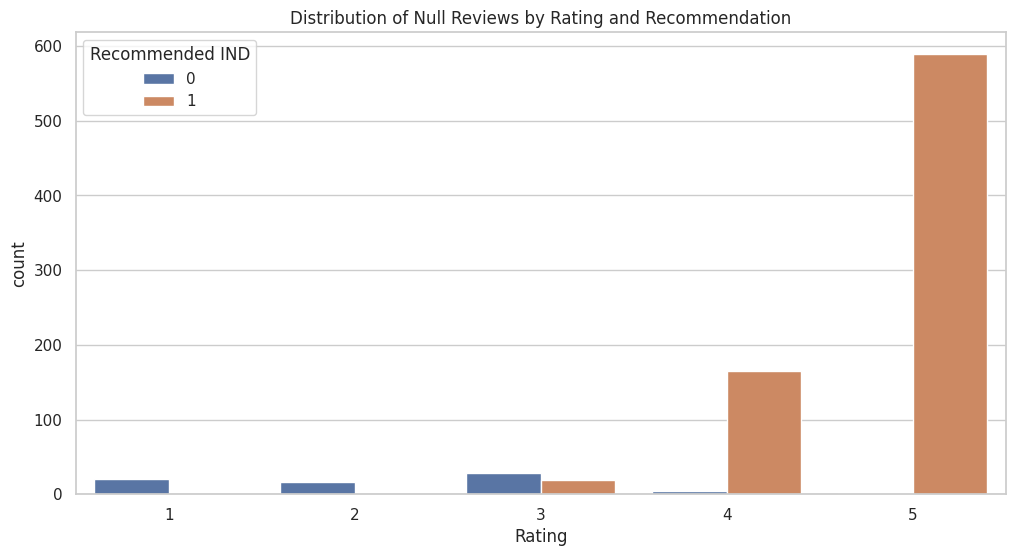

In [73]:
# we have null values in review text column and i want to see the ratings and recommended ind for them
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=df[df['Review Text'].isnull()])
plt.title('Distribution of Null Reviews by Rating and Recommendation')
plt.show()

# it shows that they most likely to give a high rating and recommend the product

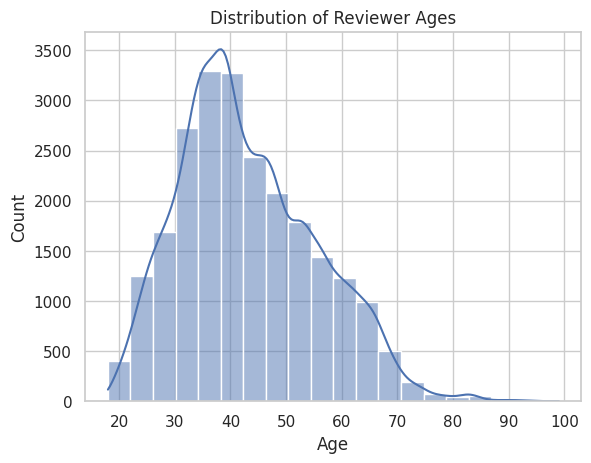

In [74]:
# looking at the customer ages
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Reviewer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# most of them are between 30-55

<Figure size 1200x600 with 0 Axes>

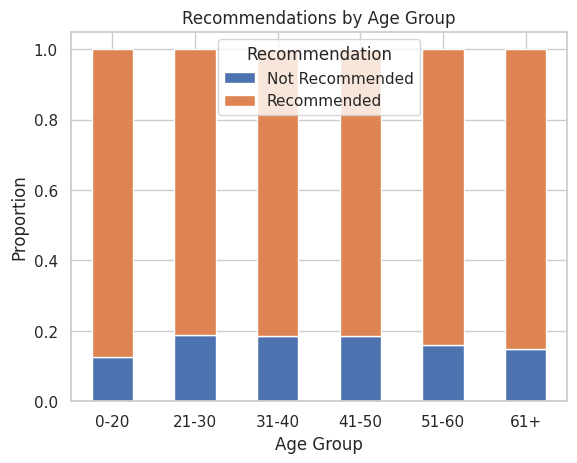

In [75]:
# new data frame so we do not make changes on the original data frame
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61+'])

# recommendations by age group
ct = pd.crosstab(df['Age Group'], df['Recommended IND'], normalize='index')

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
ct.plot(kind='bar', stacked=True)
plt.title('Recommendations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Recommendation', labels=['Not Recommended', 'Recommended'])
plt.xticks(rotation=0)
plt.show()

# minority of reviews marked as "Not Recommended", seems like Age is not a good feature to effect the model

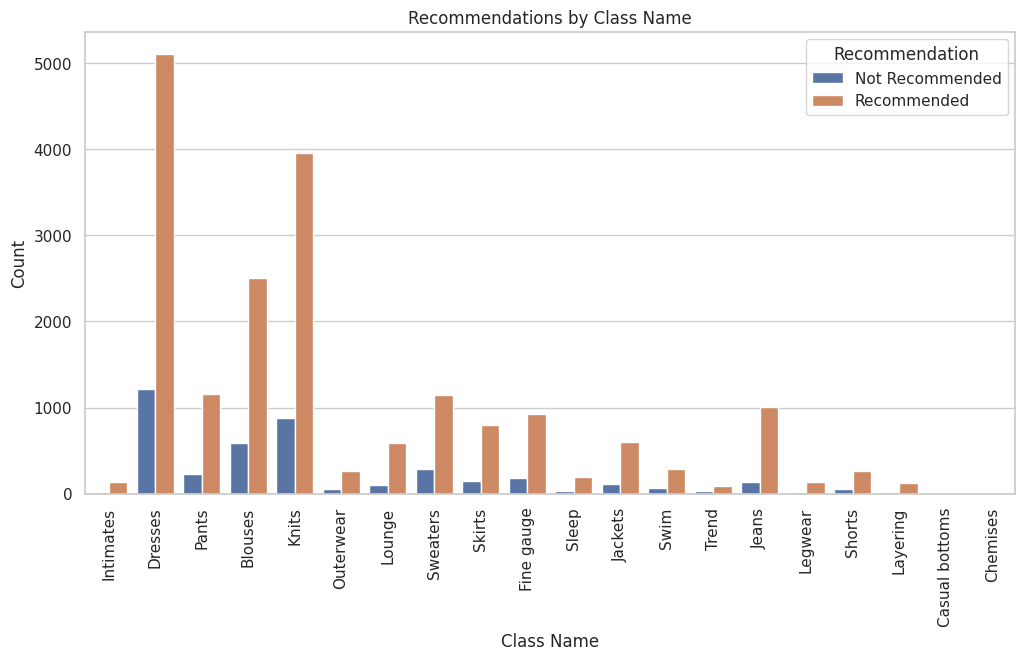

In [76]:
# Create a countplot to visualize recommendations based on "Class Name"
plt.figure(figsize=(12, 6))
sns.countplot(x='Class Name', hue='Recommended IND', data=df)
plt.title('Recommendations by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Recommendation', labels=['Not Recommended', 'Recommended'])
plt.show()

# seems like the dresses have to most attention

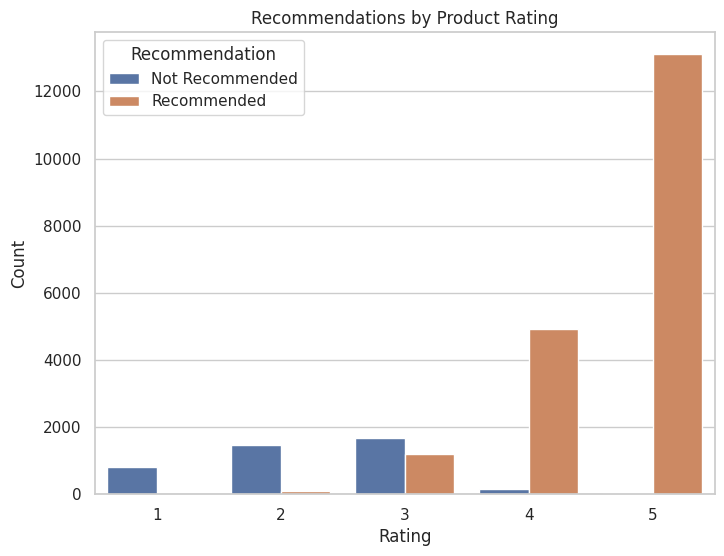

In [77]:
# recommendations based on product ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=df)
plt.title('Recommendations by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Recommendation', labels=['Not Recommended', 'Recommended'])
plt.show()

# ratings between 1-3 are most likely to be not recommended

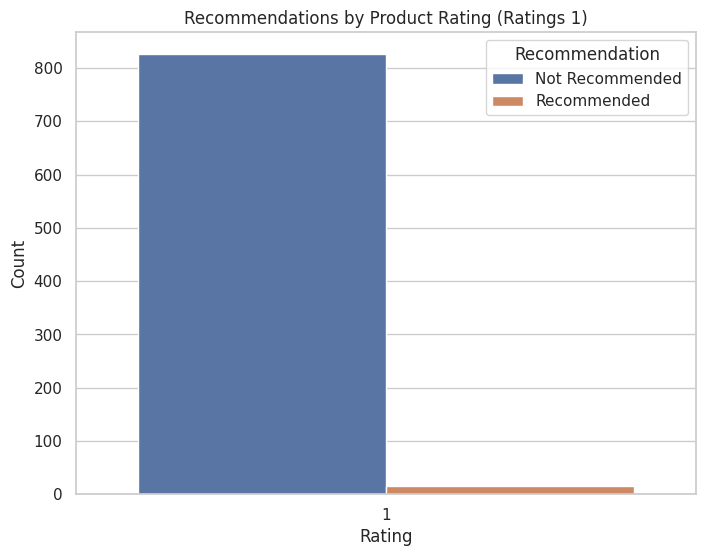

In [78]:
# lets see how many people are trolling XD
troll_df = df[df['Rating'].isin([1])]

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=troll_df)
plt.title('Recommendations by Product Rating (Ratings 1)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Recommendation', labels=['Not Recommended', 'Recommended'])
plt.show()

In [79]:
trolling_df = df[df['Rating'] == 1]

trolling_count = trolling_df[trolling_df['Recommended IND'] == 1]['Recommended IND'].count()

# Print the number of products with rating 1 that are recommended
print(f"Number of products with a rating of 1 that are recommended: {trolling_count}")

# only 16 of them are trolling

Number of products with a rating of 1 that are recommended: 16


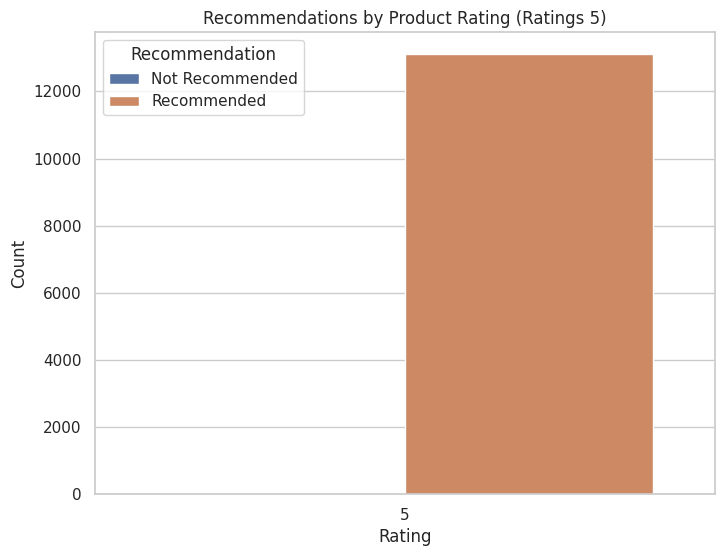

In [80]:
# lets see how many people are trolling XD
troll_df = df[df['Rating'].isin([5])]

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', hue='Recommended IND', data=troll_df)
plt.title('Recommendations by Product Rating (Ratings 5)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Recommendation', labels=['Not Recommended', 'Recommended'])
plt.show()

In [81]:
trolling_df1 = df[df['Rating'] == 5]

trolling_count1 = trolling_df1[trolling_df1['Recommended IND'] == 0]['Recommended IND'].count()

# Print the number of products with rating 5 that are not recommended
print(f"Number of products with a rating of 5 that are not recommended: {trolling_count1}")

# 25 are rating the Products with 5 but they did not recommend it

Number of products with a rating of 5 that are not recommended: 25


In [82]:
# Filter the DataFrame to include rows with null "Review Text," a rating of 5, and a recommendation of "Not Recommended"
null_review_5_not_recommended = df[(df['Review Text'].isnull()) & (df['Rating'] == 5) & (df['Recommended IND'] == 0)]

# Filter the DataFrame to include rows with null "Review Text," a rating of 1, and a recommendation of "Recommended"
null_review_1_recommended = df[(df['Review Text'].isnull()) & (df['Rating'] == 1) & (df['Recommended IND'] == 1)]

# Display the results
print("Rows with null 'Review Text', Rating 5, and 'Not Recommended':")
null_review_5_not_recommended

print("\nRows with null 'Review Text', Rating 1, and 'Recommended':")
null_review_1_recommended

Rows with null 'Review Text', Rating 5, and 'Not Recommended':

Rows with null 'Review Text', Rating 1, and 'Recommended':


Unnamed: 0  Clothing ID  Age Title Review Text  Rating  \
20649       20649          830   64   NaN         NaN       1   

       Recommended IND  Positive Feedback Count Division Name Department Name  \
20649                1                        0       General            Tops   

      Class Name Age Group  
20649    Blouses       61+

In [83]:
# these values will confuse our model so i am going to drop them
df = df[~((df['Rating'] == 5) & (df['Recommended IND'] == 0))]

df = df[~((df['Rating'] == 1) & (df['Recommended IND'] == 1))]

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [84]:
df.shape

(23445, 12)

In [85]:
# i want to try this approach to fill the null rows and i will use Rating Feature since it has 0 nulls and add it instead of the texts
df['Review Text'].fillna("with", inplace=True)

In [86]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3797
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Age Group                     0
dtype: int64

In [87]:
sum(df.duplicated())

0

### Data Wrangling

In [88]:
df2 = df.copy()

In [89]:
df2["Review Text"].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                   Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                         Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is tr

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

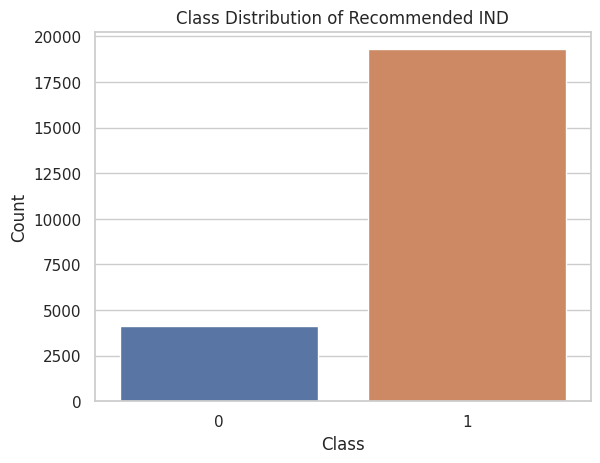

In [90]:
# Create a count plot
sns.countplot(data=df, x='Recommended IND')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution of Recommended IND')

# Show the plot
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [91]:
# Create a new DataFrame with only "Review Text" and "Recommended IND"
# i am happy with the names no need to change it
df2 = df[["Review Text", "Rating", "Recommended IND"]]

In [92]:
df2.head()

Review Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Absolutely wonderful - silky and sexy and comfortable   
1                                                                                                                                                                                                       Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.   
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3                                                                                                                                                                                                                                                                                                                                                                                          I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4                                                                                                                                                                                                                                                                                                                      This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   

   Rating  Recommended IND  
0       4                1  
1       5                1  
2       3                0  
3       5                1  
4       5                1

In [93]:
df2.shape

(23445, 3)

### Missing Value Detection

In [94]:
df2.isnull().sum()
# no null values in df2

Review Text        0
Rating             0
Recommended IND    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [95]:
# these word may effect the model decision
words_to_exclude = {"but", "very", "too", "never", "little", "more", "best", "worst", "love", "too", "no", "not"}
custom_stop_words = set(stopwords.words('english')) - words_to_exclude
custom_stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "sh

In [96]:
import re

def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in custom_stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #9. joining
    return " ".join( text_cleaned)

In [97]:
df2["Review Text"] = df2["Review Text"].apply(cleaning)

In [98]:
df2["Review Text"]

0                                                                                                                                                                                                                                                                                        absolutely wonderful silky sexy comfortable
1                                                                                                                                               love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2        high hope dress really wanted work initially ordered petite small usual size but found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely but bottom half very tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                        

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [99]:
# Step 1: Detect Reviews
positive_reviews = df2[df2["Recommended IND"] == 1]
negative_reviews = df2[df2["Recommended IND"] == 0]

### Collect Words (positive and negative separately)

In [100]:
from wordcloud import WordCloud

In [101]:
# Step 2: Collect Words
def collect_words(reviews):
    words = " ".join(reviews)
    return words

In [102]:
positive_words = collect_words(positive_reviews["Review Text"])
negative_words = collect_words(negative_reviews["Review Text"])

In [103]:
positive_words

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing but great compliment shirt very flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose but no xx kept wil ldecide later since light

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [104]:
# Generate WordCloud for positive words
positive_wordcloud = WordCloud(width=1200, height=800, background_color='grey', colormap='plasma', collocations=False).generate(positive_words)

# Generate WordCloud for negative words
negative_wordcloud = WordCloud(width=1200, height=800, background_color='black', colormap='plasma', collocations=False).generate(negative_words)

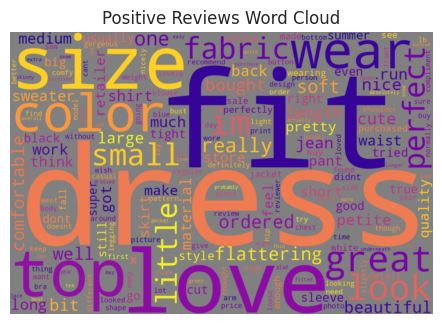

In [105]:
# Display the word clouds using matplotlib
plt.figure(figsize=(12, 12))

plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.show()

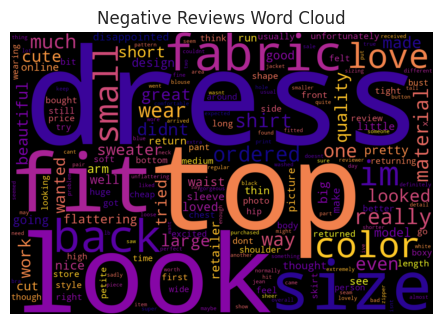

In [106]:
plt.figure(figsize=(12, 12))

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# So after cleaning the text i will add the rating to it i think it will affect the results in a good way
df2["Text"] = df2["Review Text"] + " rating " + df2["Rating"].astype(str)

In [109]:
df2 = df2.drop(columns=["Review Text", "Rating"])

In [110]:
X = df2["Text"]
y = df2["Recommended IND"]

In [111]:
seed = 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [112]:
df2.head(2)
# lets see how will it perform

Recommended IND  \
0                1   
1                1   

                                                                                                                                                                                            Text  
0                                                                                                                                           absolutely wonderful silky sexy comfortable rating 4  
1  love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite rating 5

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [115]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [116]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0     0        0        0     0    0         0           0   
1       0     0        0        0     0    0         0           0   
2       0     0        0        0     0    0         0           0   
3       0     0        0        0     0    0         0           0   
4       0     0        0        0     0    0         0           0   
...    ..   ...      ...      ...   ...  ...       ...         ...   
21095   0     0        0        0     0    0         0           0   
21096   0     0        0        0     0    0         0           0   
21097   0     0        0        0     0    0         0           0   
21098   0     0        0        0     0    0         0           0   
21099   0     0        0        0     0    0         0           0   

       absolutley  abstract  absurd  abt  abundance  ac  accent  accented  \
0               0         0       0    0          0   0       0         0   
1               0         0       0    0          0   0       0         0   
2               0         0       0    0          0   0       0         0   
3               0         0       0    0          0   0       0         0   
4               0         0       0    0          0   0       0         0   
...           ...       ...     ...  ...        ...  ..     ...       ...   
21095           0         0       0    0          0   0       0         0   
21096           0         0       0    0          0   0       0         0   
21097           0         0       0    0          0   0       0         0   
21098           0         0       0    0          0   0       0         0   
21099           0         0       0    0          0   0       0         0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0               0            0            0             0       0           0   
1               0            0            0             0       0           0   
2               0            0            0             0       0           0   
3               0            0            0             0       0           0   
4               0            0            0             0       0           0   
...           ...          ...          ...           ...     ...         ...   
21095           0            0            0             0       0           0   
21096           0            0            0             0       0           0   
21097           0            0            0             0       0           0   
21098           1            0            0             0       0           0   
21099           0            0            0             0       0           0   

       access  accessorize  accessorized  ...  yoga  yoke  york  youd  youll  \
0           0            0             0  ...     0     0     0     0      0   
1           0            0             0  ...     0     0     0     0      0   
2           0            0             0  ...     0     0     0     0      0   
3           0            0             0  ...     0     0     0     0      0   
4           0            0             0  ...     0     0     0     0      0   
...       ...          ...           ...  ...   ...   ...   ...   ...    ...   
21095       0            0             0  ...     0     0     0     0      0   
21096       0            0             0  ...     0     0     0     0      0   
21097       0            0             0  ...     0     0     0     0      0   
21098       0            0             0  ...     0     0     0     0      0   
21099       0            0             0  ...     0     0     0     0      0   

       young  younger  youre  youthful  youve  yr  yuck  yucky  yummy  zag  \
0          0        0      0         0      0   0     0      0      0    0   
1          0        0      0         0      0   0     0      0      0    0   
2          0        0      0         0      0   0     0      0      0    

### TF-IDF

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
# Create a TF-IDF vectorizer with your preprocessor and other parameters
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, max_df=0.90)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [119]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [120]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
1      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
2      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
3      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
4      0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
...    ...   ...      ...      ...   ...  ...       ...         ...   
21095  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
21096  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
21097  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
21098  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
21099  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   

       absolutley  abstract  absurd  abt  abundance   ac  accent  accented  \
0             0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
1             0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
2             0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
3             0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
4             0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
...           ...       ...     ...  ...        ...  ...     ...       ...   
21095         0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
21096         0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
21097         0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
21098         0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   
21099         0.0       0.0     0.0  0.0        0.0  0.0     0.0       0.0   

       accentuate  accentuated  accentuates  accentuating  accept  acceptable  \
0        0.000000          0.0          0.0           0.0     0.0         0.0   
1        0.000000          0.0          0.0           0.0     0.0         0.0   
2        0.000000          0.0          0.0           0.0     0.0         0.0   
3        0.000000          0.0          0.0           0.0     0.0         0.0   
4        0.000000          0.0          0.0           0.0     0.0         0.0   
...           ...          ...          ...           ...     ...         ...   
21095    0.000000          0.0          0.0           0.0     0.0         0.0   
21096    0.000000          0.0          0.0           0.0     0.0         0.0   
21097    0.000000          0.0          0.0           0.0     0.0         0.0   
21098    0.202459          0.0          0.0           0.0     0.0         0.0   
21099    0.000000          0.0          0.0           0.0     0.0         0.0   

       access  accessorize  accessorized  ...  yoga  yoke  york  youd  youll  \
0         0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
1         0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
2         0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
3         0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
4         0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
...       ...          ...           ...  ...   ...   ...   ...   ...    ...   
21095     0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
21096     0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
21097     0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
21098     0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   
21099     0.0          0.0           0.0  ...   0.0   0.0   0.0   0.0    0.0   

       young  younger  youre  youthful  youve   yr  yuck  yucky  yummy  zag  \
0        0.0      0.0    0.0       0.0    0.0  0.0   0.0    0.0    0.0  0.0   
1        0.0      0.0    0.0       0.0    0.0  0.0   0.0    0.0    0.0  0.0   
2        0.0      0.0    0.0       0.0    0.0  

### Eval Function

In [121]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [122]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [123]:
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report, confusion_matrix, auc
import matplotlib.pyplot as plt
import seaborn as sns

def plot_precision_recall(model, X_test, y_test, title):
    y_scores = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])
    pr_auc = auc(recall, precision)

    # Calculate average precision and micro-average
    average_precision = average_precision_score(y_test, y_scores[:, 1], average='weighted')

    # Plot per-class precision-recall curves
    plt.figure(figsize=(10, 8))
    plt.step(recall, precision, where='post', label=f"{title} (AUC = {pr_auc:.2f}, AP = {average_precision:.2f})")

    # Add confusion matrix heatmap
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.subplot(1, 2, 2)
    # Plot precision-recall curve
    plt.step(recall, precision, where='post', label=f"{title} (AUC = {pr_auc:.2f}, AP = {average_precision:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {title}")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [124]:
def plot_precision_recall_DL(model, X_test, y_test, title):
    y_scores = model.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Calculate average precision and micro-average
    average_precision = average_precision_score(y_test, y_scores, average='weighted')

    # Plot per-class precision-recall curves
    plt.figure(figsize=(8, 6))
    plt.step(recall, precision, where='post', label=f"{title} (AUC = {pr_auc:.2f}, AP = {average_precision:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {title}")
    plt.legend()
    plt.grid()

## Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

### CountVectorizer

In [126]:
# Initialize the logistic regression model
logistic_model_count = LogisticRegression(C=0.01, max_iter=1000, class_weight= "balanced", random_state=seed)

# Fit the model to the training data
logistic_model_count.fit(X_train_count, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [127]:
print("LOG MODEL")
eval(logistic_model_count, X_train_count, X_test_count)
# not good recall for class 0 but thats normal since we have imbalanced data

LOG MODEL
[[ 364   65]
 [ 271 1645]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       429
           1       0.96      0.86      0.91      1916

    accuracy                           0.86      2345
   macro avg       0.77      0.85      0.80      2345
weighted avg       0.89      0.86      0.87      2345

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.69      3718
           1       0.97      0.86      0.91     17382

    accuracy                           0.86     21100
   macro avg       0.77      0.86      0.80     21100
weighted avg       0.90      0.86      0.87     21100



In [128]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.851991
train_accuracy     0.863755
test_f1            0.905079
train_f1           0.912565
test_recall        0.856691
train_recall       0.863083
test_precision     0.959304
train_precision    0.968065
dtype: float64

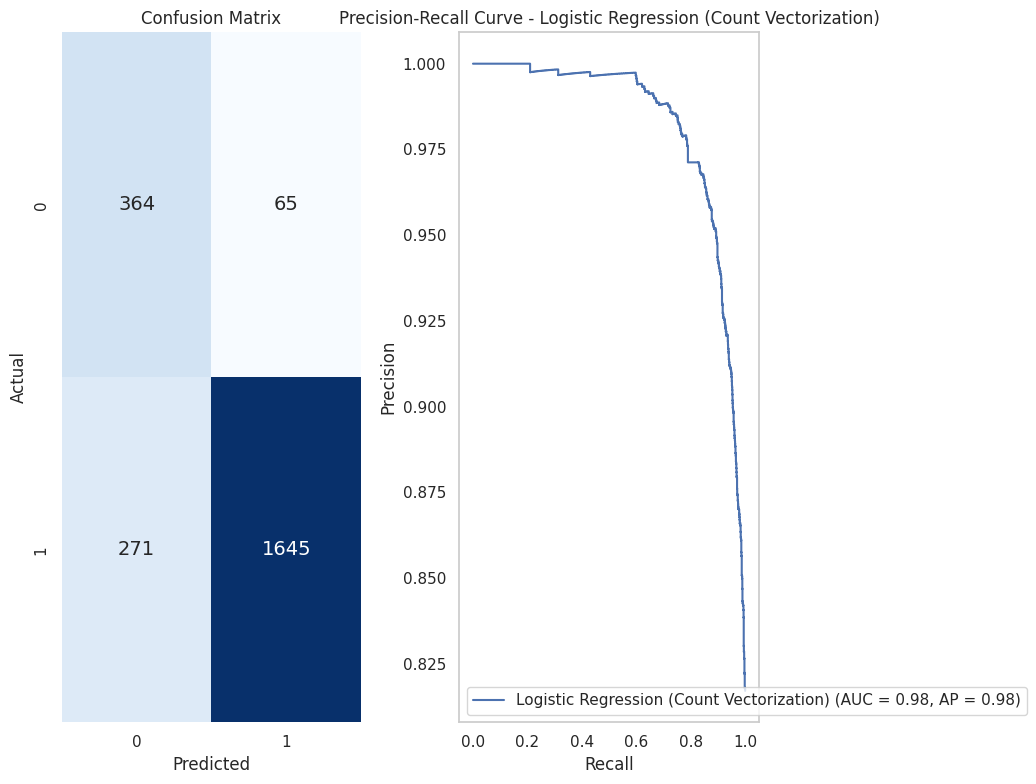

In [129]:
# Logistic Regression with Count Vectorization
plot_precision_recall(logistic_model_count, X_test_count, y_test, "Logistic Regression (Count Vectorization)")

In [130]:
y_pred = logistic_model_count.predict(X_test_count)
y_pred_proba= logistic_model_count.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [131]:
# Initialize the logistic regression model
logistic_model_TF_IDF = LogisticRegression(C=0.01, max_iter=1000, class_weight= "balanced", random_state=seed)

# Fit the model to the training data
logistic_model_TF_IDF.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [132]:
print("LOG MODEL TF-IDF")
eval(logistic_model_TF_IDF, X_train_tf_idf, X_test_tf_idf)

LOG MODEL TF-IDF
[[ 366   63]
 [ 336 1580]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.85      0.65       429
           1       0.96      0.82      0.89      1916

    accuracy                           0.83      2345
   macro avg       0.74      0.84      0.77      2345
weighted avg       0.88      0.83      0.84      2345

Train_Set
              precision    recall  f1-score   support

           0       0.51      0.86      0.64      3718
           1       0.96      0.83      0.89     17382

    accuracy                           0.83     21100
   macro avg       0.74      0.84      0.77     21100
weighted avg       0.88      0.83      0.85     21100



In [133]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.844123
train_accuracy     0.852443
test_f1            0.899114
train_f1           0.904491
test_recall        0.843286
train_recall       0.848157
test_precision     0.962885
train_precision    0.968843
dtype: float64

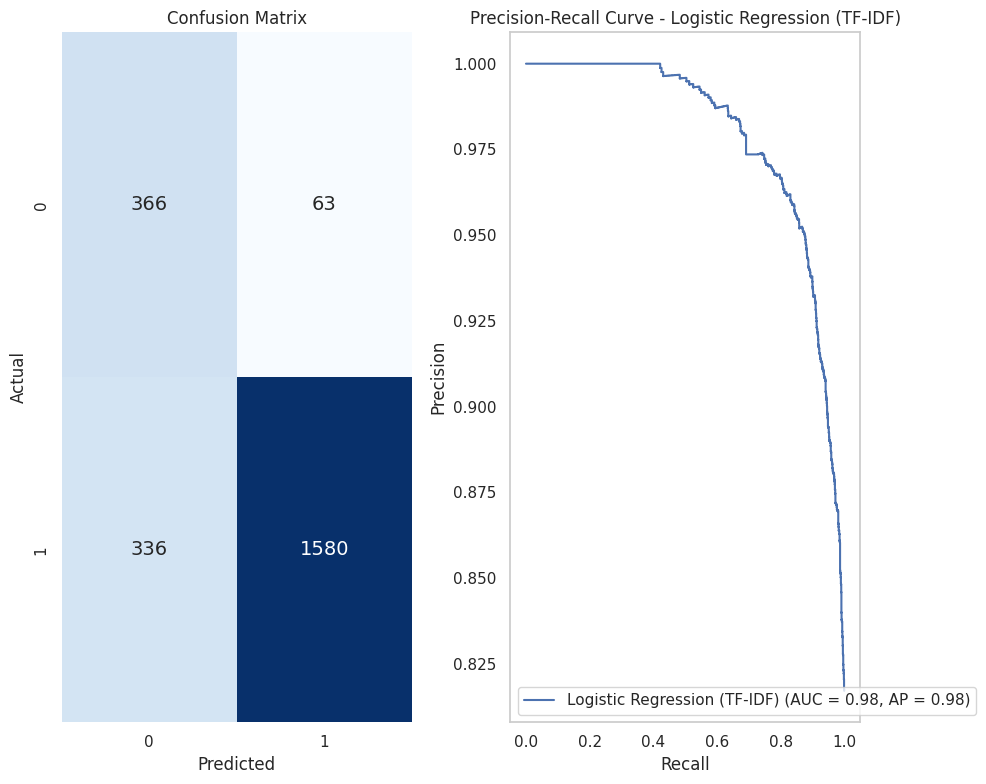

In [134]:
# Logistic Regression with TF-IDF
plot_precision_recall(logistic_model_TF_IDF, X_test_tf_idf, y_test, "Logistic Regression (TF-IDF)")

In [135]:
y_pred = logistic_model_TF_IDF.predict(X_test_tf_idf)
y_pred_proba= logistic_model_TF_IDF.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [136]:
from sklearn.naive_bayes import MultinomialNB , BernoulliNB

# Initialize the Naive Bayes model with Count Vectorization
naive_bayes_model_count = MultinomialNB(alpha=1.5)

# Fit the model to the training data
naive_bayes_model_count.fit(X_train_count, y_train)

MultinomialNB(alpha=1.5)

In [137]:
print("NAIVE BAYES MODEL (Count Vectorization)")
eval(naive_bayes_model_count, X_train_count, X_test_count)

NAIVE BAYES MODEL (Count Vectorization)
[[ 303  126]
 [ 159 1757]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       429
           1       0.93      0.92      0.92      1916

    accuracy                           0.88      2345
   macro avg       0.79      0.81      0.80      2345
weighted avg       0.88      0.88      0.88      2345

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      3718
           1       0.96      0.93      0.94     17382

    accuracy                           0.90     21100
   macro avg       0.83      0.86      0.84     21100
weighted avg       0.91      0.90      0.91     21100



In [138]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.887488
train_accuracy     0.904444
test_f1            0.930716
train_f1           0.941136
test_recall        0.917385
train_recall       0.927281
test_precision     0.944471
train_precision    0.955411
dtype: float64

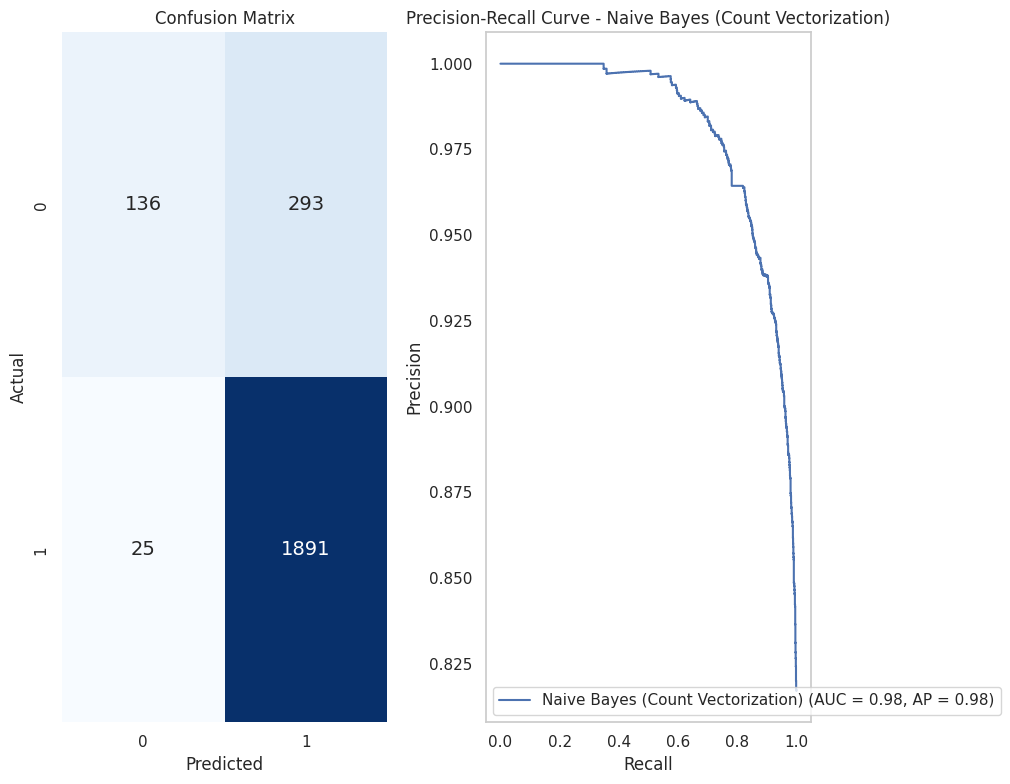

In [139]:
# Naive Bayes with Count Vectorization
plot_precision_recall(naive_bayes_model_count, X_test_tf_idf, y_test, "Naive Bayes (Count Vectorization)")

In [140]:
y_pred = naive_bayes_model_count.predict(X_test_count)
y_pred_proba= naive_bayes_model_count.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [141]:
# Initialize the Naive Bayes model with TF-IDF
naive_bayes_model_TF_IDF = BernoulliNB(alpha=0.7)

# Fit the model to the training data
naive_bayes_model_TF_IDF.fit(X_train_tf_idf, y_train)

BernoulliNB(alpha=0.7)

In [142]:
print("NAIVE BAYES MODEL (TF-IDF)")
eval(naive_bayes_model_TF_IDF, X_train_tf_idf, X_test_tf_idf)

NAIVE BAYES MODEL (TF-IDF)
[[ 297  132]
 [ 179 1737]]
Test_Set
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       429
           1       0.93      0.91      0.92      1916

    accuracy                           0.87      2345
   macro avg       0.78      0.80      0.79      2345
weighted avg       0.87      0.87      0.87      2345

Train_Set
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      3718
           1       0.95      0.92      0.93     17382

    accuracy                           0.89     21100
   macro avg       0.81      0.85      0.83     21100
weighted avg       0.90      0.89      0.90     21100



In [143]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.876114
train_accuracy     0.896182
test_f1            0.923372
train_f1           0.935783
test_recall        0.906225
train_recall       0.918223
test_precision     0.941219
train_precision    0.954027
dtype: float64

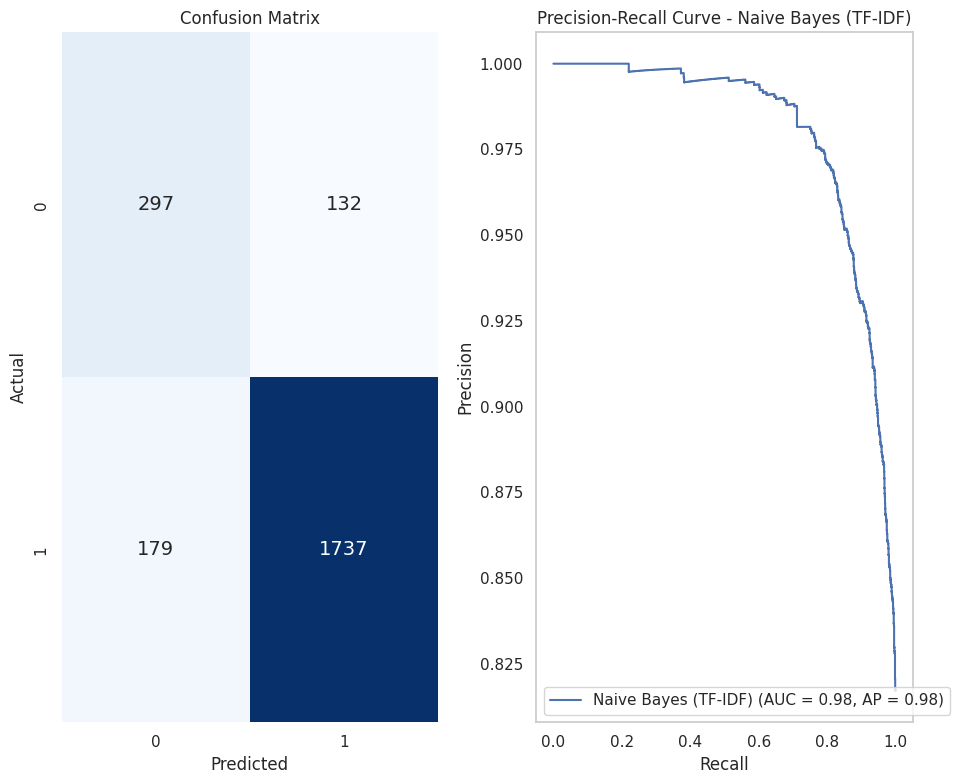

In [144]:
# Naive Bayes with TF-IDF
plot_precision_recall(naive_bayes_model_TF_IDF, X_test_tf_idf, y_test, "Naive Bayes (TF-IDF)")

In [145]:
y_pred = naive_bayes_model_TF_IDF.predict(X_test_tf_idf)
y_pred_proba= naive_bayes_model_TF_IDF.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [146]:
from sklearn.svm import LinearSVC

# Initialize the SVM model with Count Vectorization
svm_model_count = LinearSVC(C=0.001, class_weight="balanced", random_state=seed)

# Fit the model to the training data
svm_model_count.fit(X_train_count, y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [147]:
# Evaluate the model
print("SVM Model (Count Vectorization)")
eval(svm_model_count, X_train_count, X_test_count)

SVM Model (Count Vectorization)
[[ 365   64]
 [ 274 1642]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       429
           1       0.96      0.86      0.91      1916

    accuracy                           0.86      2345
   macro avg       0.77      0.85      0.80      2345
weighted avg       0.89      0.86      0.87      2345

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.69      3718
           1       0.97      0.86      0.91     17382

    accuracy                           0.86     21100
   macro avg       0.77      0.87      0.80     21100
weighted avg       0.90      0.86      0.87     21100



In [148]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.852701
train_accuracy     0.864429
test_f1            0.905487
train_f1           0.912934
test_recall        0.856691
train_recall       0.862802
test_precision     0.960233
train_precision    0.969251
dtype: float64

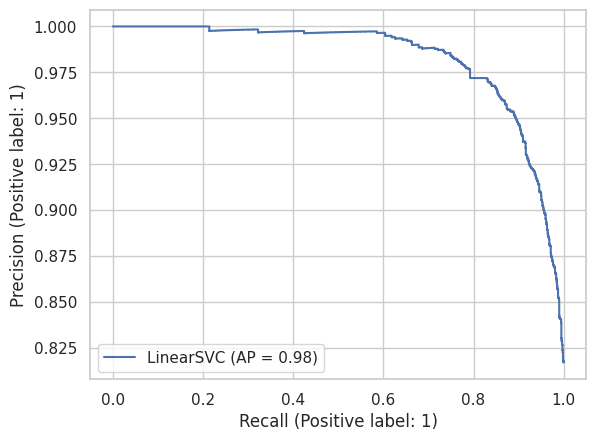

In [149]:
from sklearn.metrics import PrecisionRecallDisplay

# SVM with Count Vectorization
PrecisionRecallDisplay.from_estimator(svm_model_count,
                                      X_test_count,
                                      y_test);

In [150]:
y_pred = svm_model_count.predict(X_test_count)
decision_function= svm_model_count.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [151]:
# Initialize the SVM model with TF-IDF
svm_model_tfidf = LinearSVC(C=0.03, class_weight="balanced", random_state=101)

# Fit the model to the training data
svm_model_tfidf.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [152]:
# Evaluate the model
print("SVM Model (TF-IDF)")
eval(svm_model_tfidf, X_train_tf_idf, X_test_tf_idf)

SVM Model (TF-IDF)
[[ 372   57]
 [ 269 1647]]
Test_Set
              precision    recall  f1-score   support

           0       0.58      0.87      0.70       429
           1       0.97      0.86      0.91      1916

    accuracy                           0.86      2345
   macro avg       0.77      0.86      0.80      2345
weighted avg       0.90      0.86      0.87      2345

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3718
           1       0.98      0.87      0.92     17382

    accuracy                           0.88     21100
   macro avg       0.79      0.89      0.82     21100
weighted avg       0.91      0.88      0.89     21100



In [153]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.861517
train_accuracy     0.876298
test_f1            0.911291
train_f1           0.920594
test_recall        0.863537
train_recall       0.870460
test_precision     0.964664
train_precision    0.976858
dtype: float64

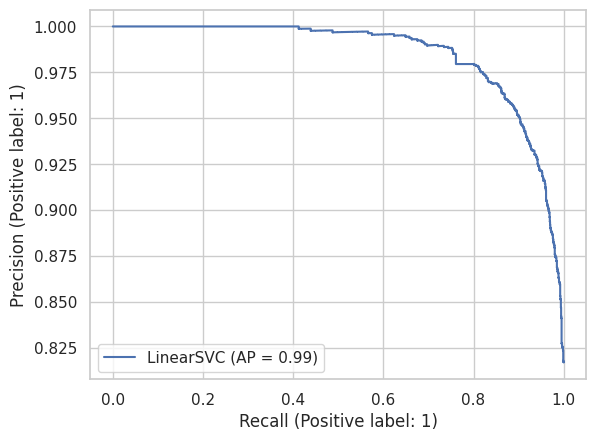

In [154]:
# SVM with TF-IDF
PrecisionRecallDisplay.from_estimator(svm_model_tfidf,
                                      X_test_tf_idf,
                                      y_test);

In [155]:
y_pred = svm_model_tfidf.predict(X_test_tf_idf)
decision_function= svm_model_tfidf.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with Count Vectorization
random_forest_model_count = RandomForestClassifier(100, max_depth = 7, random_state = seed, n_jobs = -1, class_weight="balanced")
random_forest_model_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [157]:
print("Random Forest with Count Vectorization")
eval(random_forest_model_count, X_train_count, X_test_count)

Random Forest with Count Vectorization
[[ 347   82]
 [ 309 1607]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.81      0.64       429
           1       0.95      0.84      0.89      1916

    accuracy                           0.83      2345
   macro avg       0.74      0.82      0.77      2345
weighted avg       0.87      0.83      0.85      2345

Train_Set
              precision    recall  f1-score   support

           0       0.54      0.84      0.65      3718
           1       0.96      0.84      0.90     17382

    accuracy                           0.84     21100
   macro avg       0.75      0.84      0.78     21100
weighted avg       0.89      0.84      0.86     21100



In [158]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.824739
train_accuracy     0.845050
test_f1            0.886771
train_f1           0.900012
test_recall        0.833218
train_recall       0.846668
test_precision     0.947749
train_precision    0.960573
dtype: float64

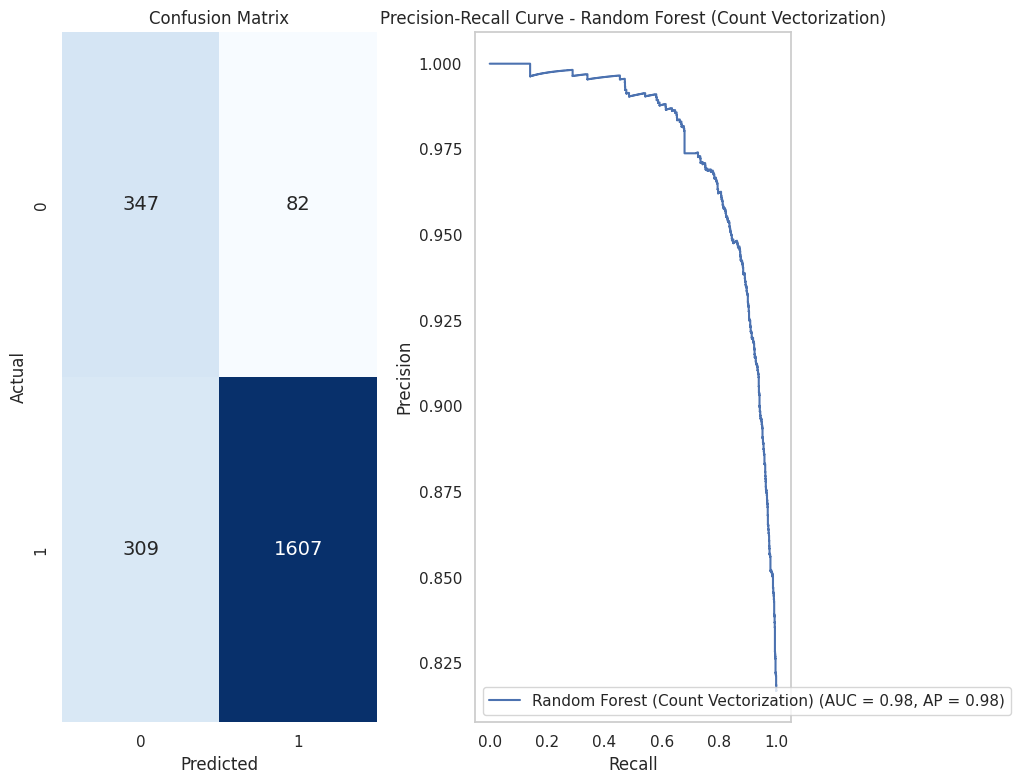

In [159]:
# Random Forest with Count Vectorization
plot_precision_recall(random_forest_model_count, X_test_count, y_test, "Random Forest (Count Vectorization)")

In [160]:
y_pred = random_forest_model_count.predict(X_test_count)
y_pred_proba= random_forest_model_count.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [161]:
# Random Forest with TF-IDF
random_forest_model_tfidf = RandomForestClassifier(100, max_depth = 7, random_state = seed, n_jobs = -1, class_weight="balanced")
random_forest_model_tfidf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=101)

In [162]:
print("Random Forest with TF-IDF")
eval(random_forest_model_tfidf, X_train_tf_idf, X_test_tf_idf)

Random Forest with TF-IDF
[[ 349   80]
 [ 331 1585]]
Test_Set
              precision    recall  f1-score   support

           0       0.51      0.81      0.63       429
           1       0.95      0.83      0.89      1916

    accuracy                           0.82      2345
   macro avg       0.73      0.82      0.76      2345
weighted avg       0.87      0.82      0.84      2345

Train_Set
              precision    recall  f1-score   support

           0       0.53      0.85      0.66      3718
           1       0.96      0.84      0.90     17382

    accuracy                           0.84     21100
   macro avg       0.75      0.85      0.78     21100
weighted avg       0.89      0.84      0.86     21100



In [163]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.821043
train_accuracy     0.845182
test_f1            0.884019
train_f1           0.899636
test_recall        0.828157
train_recall       0.842487
test_precision     0.948062
train_precision    0.965164
dtype: float64

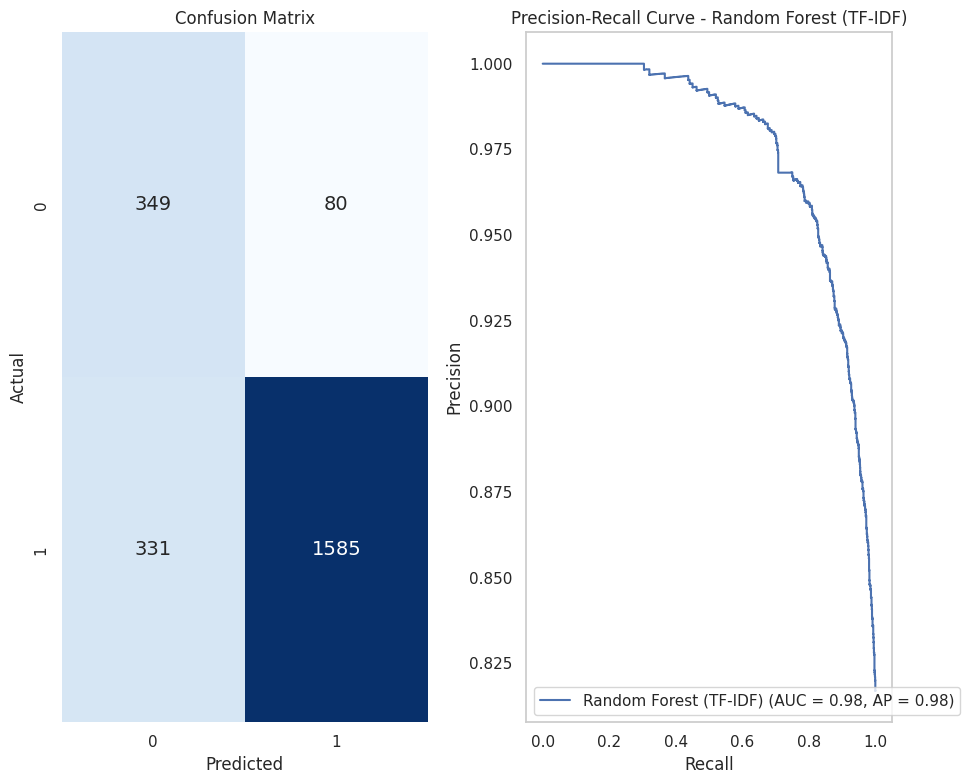

In [164]:
# Random Forest with TF-IDF
plot_precision_recall(random_forest_model_tfidf, X_test_tf_idf, y_test, "Random Forest (TF-IDF)")

In [165]:
y_pred = random_forest_model_tfidf.predict(X_test_tf_idf)
y_pred_proba= random_forest_model_tfidf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [166]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model with Count Vectorization
adaboost_model_count = AdaBoostClassifier(n_estimators=50, random_state=seed)

# Fit the model to the training data
adaboost_model_count.fit(X_train_count, y_train)

AdaBoostClassifier(random_state=101)

In [167]:
print("ADA BOOST (Count Vectorization)")
eval(adaboost_model_count, X_train_count, X_test_count)

ADA BOOST (Count Vectorization)
[[ 191  238]
 [  94 1822]]
Test_Set
              precision    recall  f1-score   support

           0       0.67      0.45      0.54       429
           1       0.88      0.95      0.92      1916

    accuracy                           0.86      2345
   macro avg       0.78      0.70      0.73      2345
weighted avg       0.85      0.86      0.85      2345

Train_Set
              precision    recall  f1-score   support

           0       0.69      0.44      0.54      3718
           1       0.89      0.96      0.92     17382

    accuracy                           0.87     21100
   macro avg       0.79      0.70      0.73     21100
weighted avg       0.85      0.87      0.85     21100



In [168]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874739
train_accuracy     0.879189
test_f1            0.926240
train_f1           0.928892
test_recall        0.954723
train_recall       0.957875
test_precision     0.899424
train_precision    0.901613
dtype: float64

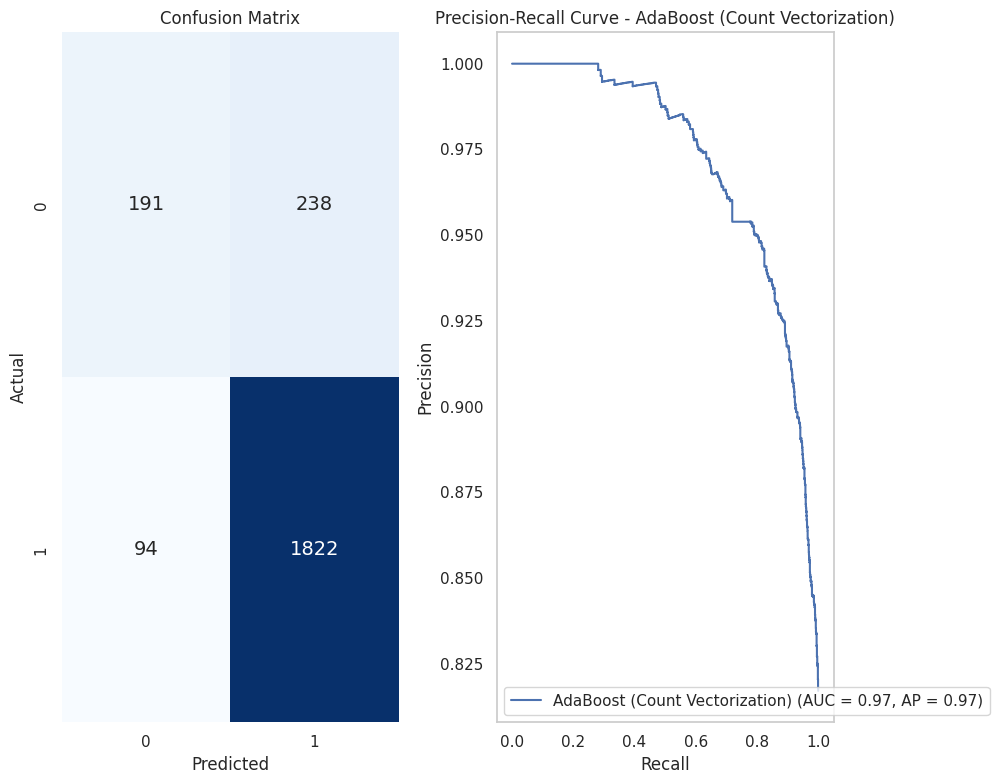

In [169]:
# AdaBoost with Count Vectorization
plot_precision_recall(adaboost_model_count, X_test_count, y_test, "AdaBoost (Count Vectorization)")

In [170]:
y_pred = adaboost_model_count.predict(X_test_count)
y_pred_proba= adaboost_model_count.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [171]:
# Initialize the AdaBoost model with Count Vectorization
adaboost_model_tf_idf = AdaBoostClassifier(n_estimators=50, random_state=seed)

# Fit the model to the training data
adaboost_model_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(random_state=101)

In [172]:
# Evaluate the model
print("ADA BOOST (TF-IDF)")
eval(adaboost_model_tf_idf, X_train_tf_idf, X_test_tf_idf)

ADA BOOST (TF-IDF)
[[ 200  229]
 [  85 1831]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.47      0.56       429
           1       0.89      0.96      0.92      1916

    accuracy                           0.87      2345
   macro avg       0.80      0.71      0.74      2345
weighted avg       0.85      0.87      0.86      2345

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.45      0.55      3718
           1       0.89      0.96      0.92     17382

    accuracy                           0.87     21100
   macro avg       0.79      0.70      0.73     21100
weighted avg       0.86      0.87      0.86     21100



In [173]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870332
train_accuracy     0.879531
test_f1            0.924723
train_f1           0.929943
test_recall        0.966747
train_recall       0.970576
test_precision     0.886211
train_precision    0.892575
dtype: float64

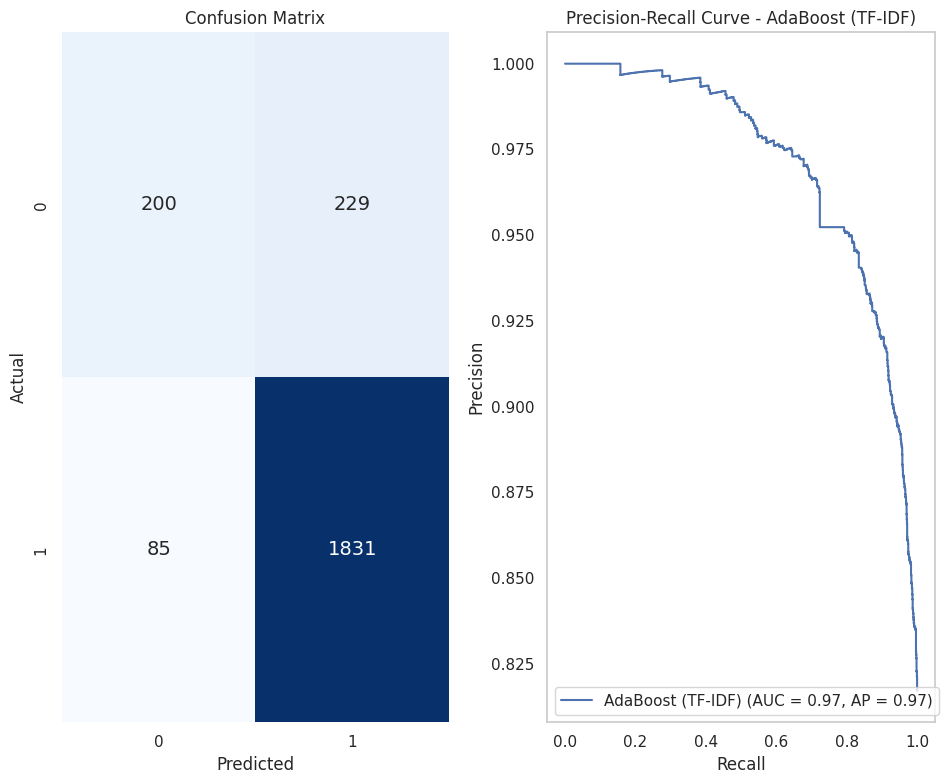

In [174]:
# AdaBoost with TF-IDF
plot_precision_recall(adaboost_model_tf_idf, X_test_tf_idf, y_test, "AdaBoost (TF-IDF)")

In [175]:
y_pred = adaboost_model_tf_idf.predict(X_test_tf_idf)
y_pred_proba= adaboost_model_tf_idf.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [177]:
num_words = 15005 # setting no of words to 15005

tokenizer = Tokenizer(num_words=num_words)

In [178]:
X.head

<bound method NDFrame.head of 0                                                                                                                                                                                                                                                                                        absolutely wonderful silky sexy comfortable rating 4
1                                                                                                                                               love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite rating 5
2        high hope dress really wanted work initially ordered petite small usual size but found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely but bottom half very tight layer several somewhat cheap net layer imo major design flaw net layer 

In [179]:
tokenizer.fit_on_texts(X)

### Creating word index

In [180]:
tokenizer.word_index

{'rating': 1,
 'but': 2,
 '5': 3,
 'dress': 4,
 'fit': 5,
 'not': 6,
 'size': 7,
 'love': 8,
 'top': 9,
 'very': 10,
 'like': 11,
 'color': 12,
 'look': 13,
 'wear': 14,
 'great': 15,
 'too': 16,
 'im': 17,
 '4': 18,
 'would': 19,
 'fabric': 20,
 'small': 21,
 'more': 22,
 'really': 23,
 'ordered': 24,
 'little': 25,
 'perfect': 26,
 'one': 27,
 'flattering': 28,
 'soft': 29,
 'well': 30,
 'back': 31,
 'comfortable': 32,
 'cute': 33,
 'nice': 34,
 'bought': 35,
 'beautiful': 36,
 'bit': 37,
 '3': 38,
 'material': 39,
 'large': 40,
 'shirt': 41,
 'much': 42,
 'sweater': 43,
 'length': 44,
 'run': 45,
 'jean': 46,
 'also': 47,
 'work': 48,
 'petite': 49,
 'got': 50,
 'long': 51,
 'short': 52,
 'waist': 53,
 'quality': 54,
 'medium': 55,
 'skirt': 56,
 'think': 57,
 'pretty': 58,
 'even': 59,
 'retailer': 60,
 'x': 61,
 'make': 62,
 'feel': 63,
 'tried': 64,
 'pant': 65,
 'store': 66,
 'usually': 67,
 'get': 68,
 'way': 69,
 'sleeve': 70,
 'good': 71,
 'could': 72,
 'big': 73,
 'made': 74

In [181]:
# 14832 Unique tokenizers
len(tokenizer.word_index)

11991

### Converting tokens to numeric

In [182]:
X_sequences = tokenizer.texts_to_sequences(X)

In [183]:
X_sequences

[[185, 417, 744, 525, 32, 1, 18],
 [8,
  4,
  1414,
  58,
  1087,
  161,
  66,
  17,
  233,
  1003,
  330,
  19,
  24,
  86,
  1003,
  49,
  35,
  49,
  8,
  44,
  172,
  25,
  219,
  19,
  103,
  84,
  1142,
  337,
  609,
  49,
  1,
  3],
 [147,
  402,
  4,
  23,
  139,
  48,
  929,
  24,
  49,
  21,
  173,
  7,
  2,
  162,
  5506,
  21,
  21,
  512,
  72,
  6,
  587,
  1756,
  49,
  55,
  182,
  9,
  528,
  32,
  5,
  188,
  2,
  102,
  528,
  10,
  97,
  308,
  409,
  564,
  379,
  3802,
  308,
  1529,
  1530,
  89,
  722,
  3802,
  308,
  676,
  2714,
  347,
  798,
  1,
  38],
 [8, 8, 8, 456, 207, 1059, 633, 234, 100, 14, 68, 415, 2, 15, 148, 1, 3],
 [41,
  10,
  28,
  372,
  942,
  108,
  322,
  26,
  44,
  14,
  191,
  960,
  134,
  30,
  290,
  8,
  41,
  1,
  3],
 [8,
  1626,
  1627,
  4,
  2,
  27,
  6,
  10,
  49,
  667,
  243,
  67,
  14,
  328,
  4,
  10,
  58,
  824,
  2,
  132,
  4,
  56,
  51,
  10,
  252,
  2004,
  21,
  317,
  6,
  1816,
  1364,
  3119,
  6970,
  56,
 

### Maximum number of tokens for all documents¶

In [184]:
# seeing the difference in our tokens maximum and minimum number of tokens in sequences
max_tokens = max(len(seq) for seq in X_sequences)
min_tokens = min(len(seq) for seq in X_sequences)

print(f"Maximum number of tokens in a sequence: {max_tokens}")
print(f"Minimum number of tokens in a sequence: {min_tokens}")

Maximum number of tokens in a sequence: 65
Minimum number of tokens in a sequence: 2


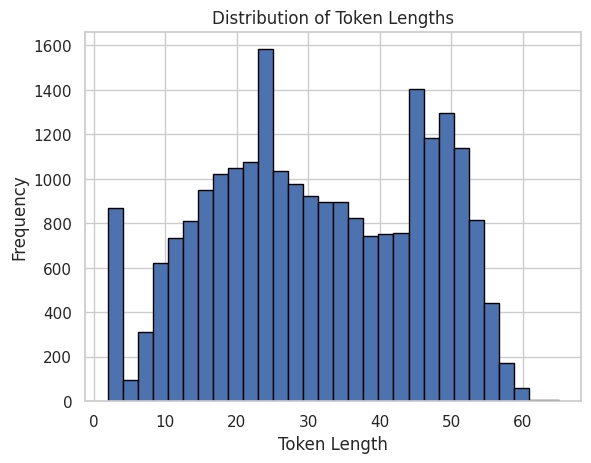

In [185]:
token_lengths = [len(tokens) for tokens in X_sequences]

# histogram to visualize the distribution of token lengths
plt.hist(token_lengths, bins=30, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths')
plt.show()

### Fixing token counts of all documents (pad_sequences)

In [186]:
# Define the maximum sequence length
max_sequence_length = 55

In [187]:
# Lets see how many data we have which is under 105 tokens
count = sum(1 for tokens in X_sequences if len(tokens) <= max_sequence_length) / len(X_sequences)
print(f"Ratio of tokens less than or equal to {max_sequence_length}: {count:.2f}")

Ratio of tokens less than or equal to 55: 0.98


In [188]:
# pre Padding cuz the i put the rating at the end of the text
X_pad = pad_sequences(X_sequences, maxlen=max_sequence_length, padding='pre')

In [189]:
X_pad.shape

(23445, 55)

In [190]:
max_tokens = max(len(seq) for seq in X_pad)
min_tokens = min(len(seq) for seq in X_pad)

print(f"Maximum number of tokens in a sequence: {max_tokens}")
print(f"Minimum number of tokens in a sequence: {min_tokens}")

# now we have the same min and max tokens 55

Maximum number of tokens in a sequence: 55
Minimum number of tokens in a sequence: 55


In [191]:
X_pad

array([[  0,   0,   0, ...,  32,   1,  18],
       [  0,   0,   0, ...,  49,   1,   3],
       [  0,   0, 147, ..., 798,   1,  38],
       ...,
       [  0,   0,   0, ...,  15,   1,  38],
       [  0,   0,   0, ..., 136,   1,  38],
       [  0,   0,   0, ..., 149,   1,   3]], dtype=int32)

### Train Set Split

In [192]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=seed)

### Modeling

In [193]:
DLmodel = Sequential()
embedding_size = 50

In [194]:
from tensorflow.keras.metrics import Recall
import tensorflow as tf

tf.config.run_functions_eagerly(True)

DLmodel.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_sequence_length))
DLmodel.add(Dropout(0.2))

DLmodel.add(GRU(units=50, return_sequences=True))

DLmodel.add(GRU(units=25, return_sequences=True))
DLmodel.add(Dropout(0.2))

DLmodel.add(GRU(units=12, return_sequences=False))

DLmodel.add(Dense(1, activation='sigmoid'))

DLmodel.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.008), metrics=['Recall'])

In [195]:
DLmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 50)            750250    
                                                                 
 dropout (Dropout)           (None, 55, 50)            0         
                                                                 
 gru (GRU)                   (None, 55, 50)            15300     
                                                                 
 gru_1 (GRU)                 (None, 55, 25)            5775      
                                                                 
 dropout_1 (Dropout)         (None, 55, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1404      
                                                                 
 dense (Dense)               (None, 1)                 1

In [196]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [197]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train1)
pd.Series(classes_weights).unique()

array([2.82690247, 0.60743897])

In [198]:
# not an efficient way to use text data as validation data, but since the project is for learning purposes i will use it
history_dl = DLmodel.fit(X_train1, y_train1, epochs=15, batch_size=128, validation_data=(X_test1, y_test1), sample_weight=classes_weights,
             callbacks=[early_stop])

Epoch 1/15
165/165 [==============================] - 25s 93ms/step - loss: 0.2193 - recall: 0.9095 - val_loss: 0.1683 - val_recall: 0.9295
Epoch 2/15
165/165 [==============================] - 15s 91ms/step - loss: 0.1462 - recall: 0.9260 - val_loss: 0.1639 - val_recall: 0.9233
Epoch 3/15
165/165 [==============================] - 15s 91ms/step - loss: 0.1158 - recall: 0.9395 - val_loss: 0.1760 - val_recall: 0.9306
Epoch 4/15
165/165 [==============================] - 15s 92ms/step - loss: 0.0903 - recall: 0.9565 - val_loss: 0.2078 - val_recall: 0.9202
Epoch 5/15
165/165 [==============================] - 15s 93ms/step - loss: 0.0706 - recall: 0.9690 - val_loss: 0.2128 - val_recall: 0.9280
Epoch 5: early stopping


### Model Evaluation

In [199]:
# Evaluating on the test set
y_pred = DLmodel.predict(X_test1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test1, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test1, y_pred_classes)
print("Classification Report:")
print(class_report)

# Evaluating on the training set
y_pred_train = DLmodel.predict(X_train1)
y_pred_train_classes = (y_pred_train > 0.5).astype(int)

# Confusion Matrix for training set
conf_matrix_train = confusion_matrix(y_train1, y_pred_train_classes)
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)

# Classification Report for training set
class_report_train = classification_report(y_train1, y_pred_train_classes)
print("Classification Report (Training Set):")
print(class_report_train)

74/74 [==============================] - 1s 19ms/step
Confusion Matrix:
[[ 397   18]
 [ 134 1796]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       415
           1       0.99      0.93      0.96      1930

    accuracy                           0.94      2345
   macro avg       0.87      0.94      0.90      2345
weighted avg       0.95      0.94      0.94      2345

660/660 [==============================] - 13s 20ms/step
Confusion Matrix (Training Set):
[[ 3700    32]
 [  752 16616]]
Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      3732
           1       1.00      0.96      0.98     17368

    accuracy                           0.96     21100
   macro avg       0.91      0.97      0.94     21100
weighted avg       0.97      0.96      0.96     21100



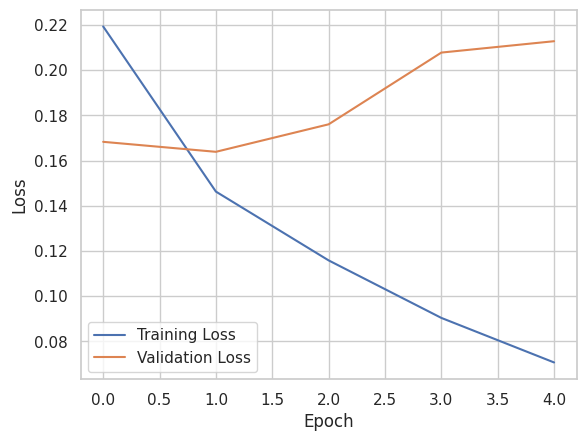

In [200]:
# Plotting training and validation loss
plt.plot(history_dl.history['loss'], label='Training Loss')
plt.plot(history_dl.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

74/74 [==============================] - 1s 18ms/step


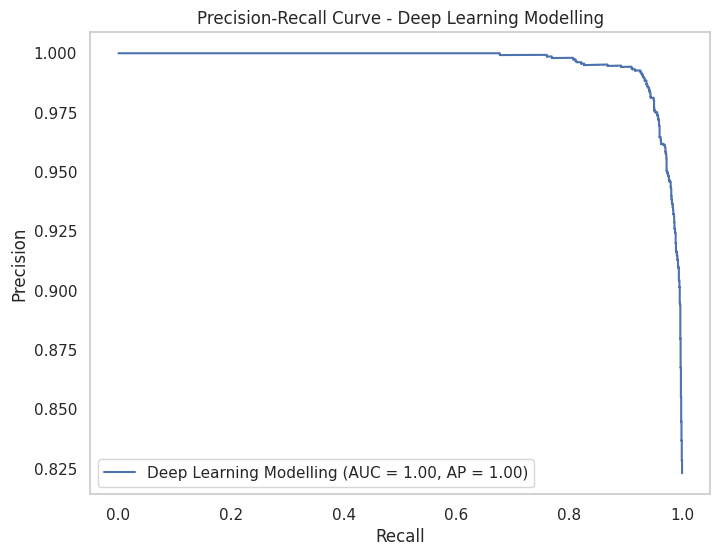

In [201]:
plot_precision_recall_DL(DLmodel, X_test1, y_test1, "Deep Learning Modelling")

In [202]:
y_pred = DLmodel.predict(X_test1) >= 0.5
y_pred_proba = DLmodel.predict(X_test1)

DL_AP = average_precision_score(y_test1, y_pred_proba)
DL_f1 = f1_score(y_test1, y_pred)
DL_rec = recall_score(y_test1, y_pred)

74/74 [==============================] - 1s 19ms/step


## BERT Modeling

In [ ]:
# Please note that i did not use TPU because i had several problems with it so i just used GPU

In [203]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.3 MB/s eta 0:00:00


In [204]:
X

0                                                                                                                                                                                                                                                                                        absolutely wonderful silky sexy comfortable rating 4
1                                                                                                                                               love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite rating 5
2        high hope dress really wanted work initially ordered petite small usual size but found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely but bottom half very tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c rating 

### Tokenization

In [205]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')

# Get the vocabulary size
vocab_size = tokenizer_bert.vocab_size
print(f"Vocabulary size: {vocab_size}")

Vocabulary size: 30522


In [206]:
import random

random_index = random.randint(0, len(df2) - 1)
random_text = df2['Text'].iloc[random_index]

In [267]:
tokenized_text = tokenizer_bert.tokenize(random_text)

In [268]:
# Print original text and tokenized version to see how it works
print(f"Original Text: {random_text}")
print(f"Tokenized Text: {tokenized_text}")

Original Text: feel way shirt sungarden tee lovely pattern like fit not clingy but bit not bad tee but no contrasting patterned bra worn shirt unless thats thing said im happy soft pretty shirt get lot wear warm weather very glad got sale though wouldnt paid full price rating 3
Tokenized Text: ['feel', 'way', 'shirt', 'sung', '##ard', '##en', 'tee', 'lovely', 'pattern', 'like', 'fit', 'not', 'cl', '##ing', '##y', 'but', 'bit', 'not', 'bad', 'tee', 'but', 'no', 'contrasting', 'patterned', 'bra', 'worn', 'shirt', 'unless', 'that', '##s', 'thing', 'said', 'im', 'happy', 'soft', 'pretty', 'shirt', 'get', 'lot', 'wear', 'warm', 'weather', 'very', 'glad', 'got', 'sale', 'though', 'wouldn', '##t', 'paid', 'full', 'price', 'rating', '3']


In [264]:
# Tokenize X_train after a little bit of reading i found an aproach to reduce overfitting and to make the model more efficient
# we Tokenize the training data then fix all tokens regarding to it then rokenize test data too
tokenized_texts = X_train.apply(lambda x: tokenizer_bert.encode(x, add_special_tokens=True))

### Fixing token counts of all documents

In [269]:
# Calculate the length of each tokenized text
token_lengths = [len(tokens) for tokens in tokenized_texts]

max_length = max(token_lengths)
print(f"Max Token Length: {max_length}")

Max Token Length: 79


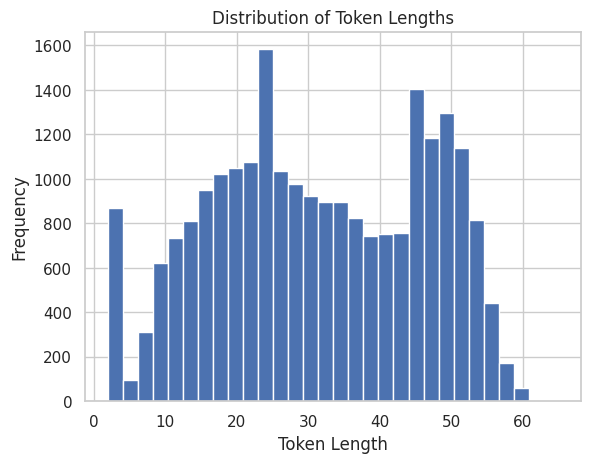

In [209]:
# Plot the distribution of token lengths
plt.hist(token_lengths, bins=30)
plt.title('Distribution of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [210]:
num_short_sequences = sum(length <= 64 for length in token_lengths)

# Calculate the total number of data points
total_sequences = len(token_lengths)

# Calculate the ratio
ratio_short_sequences = num_short_sequences / total_sequences

print(f"Number of sequences with token length <= 64: {num_short_sequences}")
print(f"Total number of sequences: {total_sequences}")
print(f"Ratio of sequences with token length <= 64: {ratio_short_sequences:.2%}")

# nice 98% of our data won't be affected by the change in token length

Number of sequences with token length <= 64: 23444
Total number of sequences: 23445
Ratio of sequences with token length <= 64: 100.00%


In [211]:
custom_max_length = 64

# Tokenize the whole dataset with the custom length
tokenized_texts_custom = tokenizer_bert(list(X), add_special_tokens=True, max_length=custom_max_length, padding='max_length', truncation=True)

In [212]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=seed)

In [213]:
np.array(tokenized_texts_custom['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 4377, ...,    0,    0,    0],
       [ 101, 2152, 3246, ...,    0,    0,    0],
       ...,
       [ 101, 4906, 2092, ...,    0,    0,    0],
       [ 101, 4149, 4377, ...,    0,    0,    0],
       [ 101, 4377, 8403, ...,    0,    0,    0]])

In [214]:
np.array(tokenized_texts_custom['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [215]:
input_ids = np.array(tokenized_texts_custom['input_ids'])
attention_mask = np.array(tokenized_texts_custom['attention_mask'])

### Transformation Vectors to Matrices

In [216]:
def transformation(X, tokenizer, max_length):
    # Create empty lists for input_ids and attention_mask
    Xids = []
    Xmask = []

    for text in X:
        # Tokenize each text using the provided tokenizer
        tokens = tokenizer.encode_plus(text, max_length=max_length, truncation=True, padding='max_length', add_special_tokens=True)

        # Append input_ids and attention_mask vectors
        Xids.append(tokens['input_ids'])
        Xmask.append(tokens['attention_mask'])

    # Convert lists into numpy arrays
    return np.array(Xids), np.array(Xmask)

In [217]:
# Applying the transformation function on the training set
Xids_train, Xmask_train = transformation(X_train2, tokenizer_bert, custom_max_length)

# Applying the transformation function on the test set
Xids_test, Xmask_test = transformation(X_test2, tokenizer_bert, custom_max_length)

In [218]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (21100, 64)
Xmask_train.shape : (21100, 64)
Xids_test.shape   : (2345, 64)
Xmask_test.shape  : (2345, 64)


In [219]:
Xids_train

array([[  101,  2036,  2448, ...,     0,     0,     0],
       [  101,  4377,  2025, ...,     0,     0,     0],
       [  101, 14329,  3492, ...,   102,     0,     0],
       ...,
       [  101,  2699,  3573, ...,     0,     0,     0],
       [  101,  2293,  2307, ...,     0,     0,     0],
       [  101,  2179,  3573, ...,     0,     0,     0]])

### Transformation Matrix to Tensorflow tensor

In [220]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train2))

In [221]:
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(64,), dtype=tf.int64, name=None), TensorSpec(shape=(64,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [222]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test2))

In [223]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # We convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [224]:
# Applying the mapping function to the training dataset
dataset_train = dataset_train.map(map_func)

# Applying the mapping function to the test dataset
dataset_test = dataset_test.map(map_func)

In [225]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(64,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(64,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Batch Size

In [226]:
# 16 and 32 are recommended by the developers
batch_size = 32

# Batch the training dataset
train_ds = dataset_train.batch(batch_size)

val_ds = dataset_test.batch(batch_size)

In [227]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(64,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(64,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Creating optimization

In [228]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 89.2 MB/s eta 0:00:00


In [229]:
from official.nlp import optimization

epochs = 3

# Calculate steps_per_epoch and num_train_steps
steps_per_epoch = len(train_ds) // batch_size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

# Set the initial learning rate
init_lr = 3e-5 #2e-5  3e-5, 5e-5

# Create the AdamW optimizer with weight decay
optimizer = optimization.create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    optimizer_type='adamw'
)

### Creating Model with TPU

In [232]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import TFAutoModel

# Create the BERT model
def create_model():

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = tf.keras.layers.Input(shape=(custom_max_length,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(custom_max_length,), name='attention_mask', dtype='int32')

    embeddings = model(input_ids=input_ids, attention_mask=attention_mask)['pooler_output']

    x = tf.keras.layers.Dense(64, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

In [233]:
bert_model = create_model()
bert_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [235]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 64)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 64)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 64, 76                                       

### Model Fiting

In [237]:
# Train the model using the fit method
history_bert = bert_model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/3
660/660 [==============================] - 538s 815ms/step - loss: 0.4289 - accuracy: 0.8783 - recall_1: 0.8618 - val_loss: 0.3872 - val_accuracy: 0.9296 - val_recall_1: 0.9223
Epoch 2/3
660/660 [==============================] - 533s 807ms/step - loss: 0.4267 - accuracy: 0.8826 - recall_1: 0.8671 - val_loss: 0.3872 - val_accuracy: 0.9296 - val_recall_1: 0.9223
Epoch 3/3
660/660 [==============================] - 529s 802ms/step - loss: 0.4298 - accuracy: 0.8802 - recall_1: 0.8648 - val_loss: 0.3843 - val_accuracy: 0.9301 - val_recall_1: 0.9228


### Model evaluation

In [238]:
model_loss = pd.DataFrame(history_bert.history)
model_loss.head()

loss  accuracy  recall_1  val_loss  val_accuracy  val_recall_1
0  0.428899  0.878294  0.861815  0.387206      0.929638      0.922280
1  0.426728  0.882607  0.867054  0.387186      0.929638      0.922280
2  0.429799  0.880237  0.864751  0.384340      0.930064      0.922798

<Axes: >

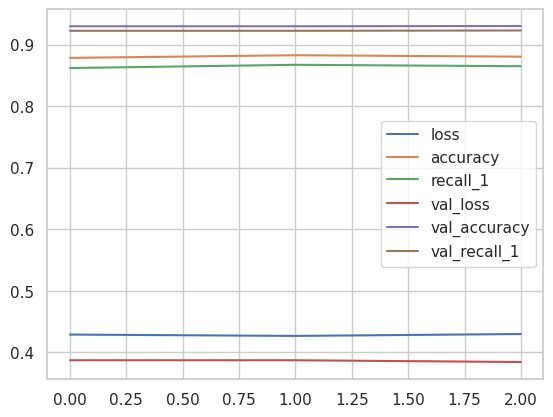

In [239]:
model_loss.plot()

In [240]:
bert_model.evaluate(train_ds)

660/660 [==============================] - 164s 249ms/step - loss: 0.3799 - accuracy: 0.9299 - recall_1: 0.9239


[0.37985700368881226, 0.9299052357673645, 0.9238830208778381]

In [241]:
bert_model.evaluate(val_ds)

74/74 [==============================] - 17s 230ms/step - loss: 0.3843 - accuracy: 0.9301 - recall_1: 0.9228


[0.384339839220047, 0.9300639629364014, 0.9227979183197021]

In [248]:
from sklearn.metrics import classification_report

conf_matrix_bert = confusion_matrix(y_test2, y_pred)
print(conf_matrix_bert)

y_pred = bert_model.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

y_train_pred = bert_model.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

[[ 400   15]
 [ 149 1781]]
74/74 [==============================] - 16s 217ms/step
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       415
           1       0.99      0.92      0.96      1930

    accuracy                           0.93      2345
   macro avg       0.86      0.94      0.89      2345
weighted avg       0.95      0.93      0.93      2345

660/660 [==============================] - 154s 233ms/step
              precision    recall  f1-score   support

           0       0.73      0.96      0.83      3732
           1       0.99      0.92      0.96     17368

    accuracy                           0.93     21100
   macro avg       0.86      0.94      0.89     21100
weighted avg       0.94      0.93      0.93     21100



74/74 [==============================] - 25s 338ms/step


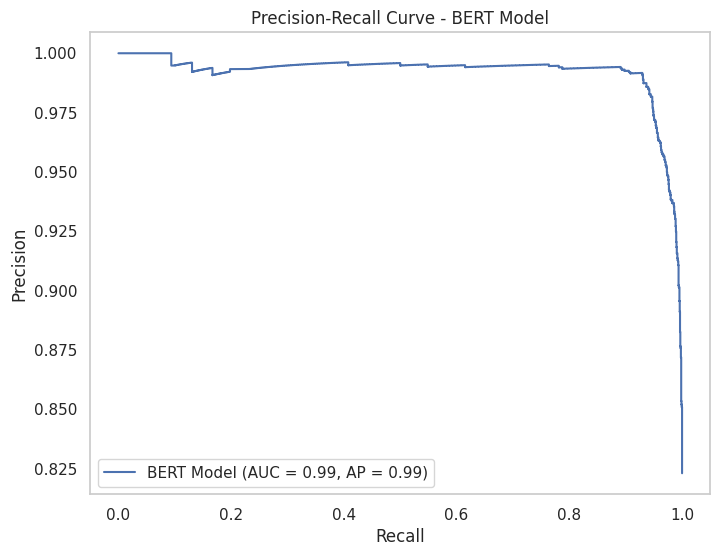

In [243]:
plot_precision_recall_DL(bert_model, val_ds, y_test, "BERT Model")

In [244]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

## Weighted BERT Model

In [249]:
import tensorflow as tf
from transformers import TFAutoModel

# Create the BERT model
def create_model():

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = tf.keras.layers.Input(shape=(custom_max_length,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(custom_max_length,), name='attention_mask', dtype='int32')

    embeddings = model(input_ids=input_ids, attention_mask=attention_mask)['pooler_output']

    x = tf.keras.layers.Dense(64, activation='relu')(embeddings)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

In [250]:
from official.nlp import optimization
epochs = 2
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [251]:
bert_weighted_model = create_model()
bert_weighted_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall()])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [252]:
pd.Series(y).value_counts(normalize=True)

1    0.823118
0    0.176882
Name: Recommended IND, dtype: float64

In [253]:
weights = {1:0.18, 0:0.81}

In [254]:
bert_weighted_model.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

Epoch 1/2
660/660 [==============================] - 539s 816ms/step - loss: 0.0862 - accuracy: 0.8800 - recall_2: 0.8725 - val_loss: 0.1786 - val_accuracy: 0.9369 - val_recall_2: 0.9326
Epoch 2/2
660/660 [==============================] - 537s 814ms/step - loss: 0.0577 - accuracy: 0.9377 - recall_2: 0.9340 - val_loss: 0.2169 - val_accuracy: 0.9433 - val_recall_2: 0.9420


# Weighted Bert Model Evaluation

In [255]:
y_pred = bert_weighted_model.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

74/74 [==============================] - 16s 216ms/step
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       415
           1       0.99      0.94      0.96      1930

    accuracy                           0.94      2345
   macro avg       0.88      0.95      0.91      2345
weighted avg       0.95      0.94      0.95      2345



In [256]:
y_train_pred = bert_weighted_model.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred))

660/660 [==============================] - 150s 228ms/step
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      3732
           1       0.99      0.95      0.97     17368

    accuracy                           0.95     21100
   macro avg       0.89      0.95      0.92     21100
weighted avg       0.96      0.95      0.95     21100



In [257]:
y_pred_proba = bert_weighted_model.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

74/74 [==============================] - 16s 215ms/step


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [258]:
# Assuming you have these models
models = ['Logistic Count', 'Logistic TF-IDF', 'Naive Bayes Count', 'Naive Bayes TF-IDF',
          'SVM Count', 'SVM TF-IDF', 'Random Forest Count', 'Random Forest TF-IDF',
          'AdaBoost Count', 'AdaBoost TF-IDF', 'DL Model', 'BERT without Weighted', 'BERT with Weighted']

f1_scores = [log_count_f1, log_tfidf_f1, nb_count_f1, nb_tfidf_f1,
             svc_count_f1, svc_tfidf_f1, rf_count_f1, rf_tfidf_f1,
             ada_count_f1, ada_tfidf_f1, DL_f1, BERT_without_weighted_f1, BERT_with_weighted_f1]

AP_scores = [log_AP_count, log_AP_tfidf, nb_AP_count, nb_AP_tfidf,
             svc_AP_count, svc_AP_tfidf, rf_AP_count, rf_AP_tfidf,
             ada_AP_count, ada_AP_tfidf, DL_AP, BERT_without_weighted_AP, BERT_with_weighted_AP]

recall_scores = [log_count_rec, log_tfidf_rec, nb_count_rec, nb_tfidf_rec,
                 svc_count_rec, svc_tfidf_rec, rf_count_rec, rf_tfidf_rec,
                 ada_count_rec, ada_tfidf_rec, DL_rec, BERT_without_weighted_rec, BERT_with_weighted_rec]

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({'Model': models, 'F1 Score': f1_scores, 'Average Precision Score': AP_scores, 'Recall Score': recall_scores})

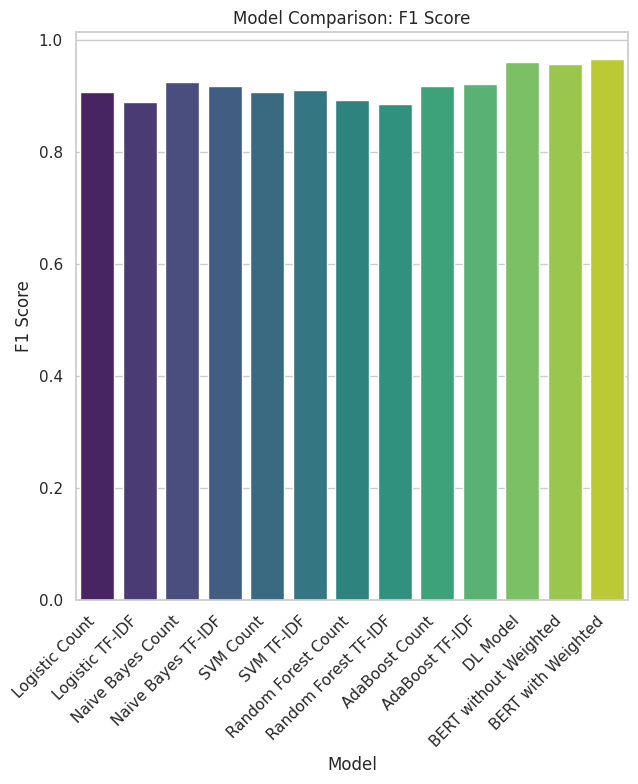

In [259]:
# Plotting
plt.figure(figsize=(18, 8))

# F1 Score Comparison
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='F1 Score', data=comparison_df, palette='viridis')
plt.title('Model Comparison: F1 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

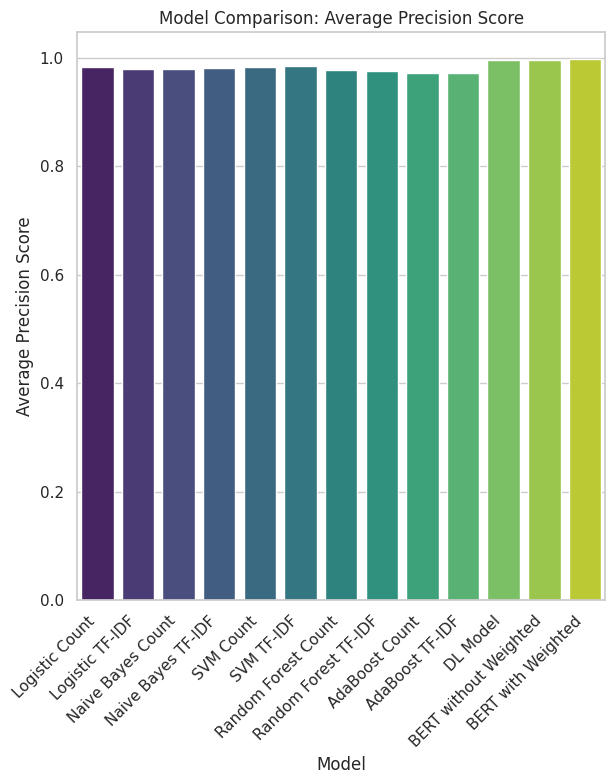

In [260]:
# Plotting
plt.figure(figsize=(18, 8))

# Average Precision Score Comparison
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='Average Precision Score', data=comparison_df, palette='viridis')
plt.title('Model Comparison: Average Precision Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

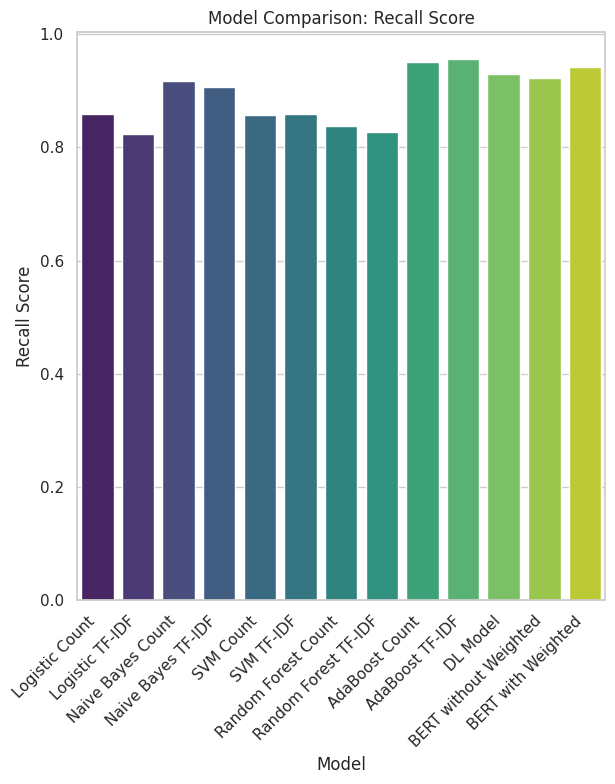

In [261]:
# Plotting
plt.figure(figsize=(18, 8))

# Recall Score Comparison
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Recall Score', data=comparison_df, palette='viridis')
plt.title('Model Comparison: Recall Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [262]:
# Create a DataFrame to store the evaluation metrics
eval_df = pd.DataFrame(columns=['Model', 'F1 Score', 'Average Precision', 'Recall'])

# Add evaluation metrics for each model
eval_df = eval_df.append({'Model': 'Logistic Regression (Count)', 'F1 Score': log_count_f1, 'Average Precision': log_AP_count, 'Recall': log_count_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Logistic Regression (TF-IDF)', 'F1 Score': log_tfidf_f1, 'Average Precision': log_AP_tfidf, 'Recall': log_tfidf_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Naive Bayes (Count)', 'F1 Score': nb_count_f1, 'Average Precision': nb_AP_count, 'Recall': nb_count_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Naive Bayes (TF-IDF)', 'F1 Score': nb_tfidf_f1, 'Average Precision': nb_AP_tfidf, 'Recall': nb_tfidf_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'SVM (Count)', 'F1 Score': svc_count_f1, 'Average Precision': svc_AP_count, 'Recall': svc_count_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'SVM (TF-IDF)', 'F1 Score': svc_tfidf_f1, 'Average Precision': svc_AP_tfidf, 'Recall': svc_tfidf_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Random Forest (Count)', 'F1 Score': rf_count_f1, 'Average Precision': rf_AP_count, 'Recall': rf_count_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Random Forest (TF-IDF)', 'F1 Score': rf_tfidf_f1, 'Average Precision': rf_AP_tfidf, 'Recall': rf_tfidf_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'AdaBoost (Count)', 'F1 Score': ada_count_f1, 'Average Precision': ada_AP_count, 'Recall': ada_count_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'AdaBoost (TF-IDF)', 'F1 Score': ada_tfidf_f1, 'Average Precision': ada_AP_tfidf, 'Recall': ada_tfidf_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'Deep Learning (GRU)', 'F1 Score': DL_f1, 'Average Precision': DL_AP, 'Recall': DL_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'BERT (Without Weighted Samples)', 'F1 Score': BERT_without_weighted_f1, 'Average Precision': BERT_without_weighted_AP, 'Recall': BERT_without_weighted_rec}, ignore_index=True)
eval_df = eval_df.append({'Model': 'BERT (With Weighted Samples)', 'F1 Score': BERT_with_weighted_f1, 'Average Precision': BERT_with_weighted_AP, 'Recall': BERT_with_weighted_rec}, ignore_index=True)

# Print the DataFrame
print(eval_df)


                              Model  F1 Score  Average Precision    Recall
0       Logistic Regression (Count)  0.907336           0.982437  0.858559
1      Logistic Regression (TF-IDF)  0.887890           0.979041  0.824635
2               Naive Bayes (Count)  0.924980           0.979930  0.917015
3              Naive Bayes (TF-IDF)  0.917834           0.980048  0.906576
4                       SVM (Count)  0.906681           0.982715  0.856994
5                      SVM (TF-IDF)  0.909945           0.985066  0.859603
6             Random Forest (Count)  0.891540           0.976767  0.838727
7            Random Forest (TF-IDF)  0.885228           0.975477  0.827244
8                  AdaBoost (Count)  0.916499           0.970826  0.950939
9                 AdaBoost (TF-IDF)  0.921026           0.971093  0.955637
10              Deep Learning (GRU)  0.959402           0.996003  0.930570
11  BERT (Without Weighted Samples)  0.955985           0.996003  0.922798
12     BERT (With Weighte

### Conclusion

In [ ]:
# The models generally perform well across different metrics.

# BERT with weighted samples shows the highest F1 Score, Average Precision, and Recall, indicating its effectiveness in handling imbalanced data.

# Naive Bayes models also perform impressively, particularly with count vectorization.

# Logistic Regression and SVM models also provide good results.

# Deep Learning (GRU) shows strong performance, but BERT outperforms it in terms of recall.

In [ ]:
# So, After comparing different models, we found that BERT with weighted samples performed the best for our recommendation system.
# This model showed the highest accuracy across various measures, making it a strong choice for accurate product suggestions.
# While other models performed well, BERT with weighted samples stood out for its effectiveness in handling imbalanced data,
# ensuring it can provide reliable recommendations in our system.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___